In [15]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2

In [28]:
def from_directory_to_data_frame(directory):
    filenames = os.listdir(directory)
    ids = [filename.split(".")[0] for filename in filenames]
    pathes = [os.path.join(directory, filename) for filename in filenames]
    
    df = pd.DataFrame({
        "id": ids,
        "path": pathes,
    })
    
    return df

def hide_spines(ax, spines=["top", "right", "bottom", "left"]):
    for spine in spines:
        ax.spines[spine].set_visible(False)
        
def load_image(path, channels=cv2.COLOR_BGR2RGB):
    if os.path.exists(path):
        image = cv2.imread(path)
        image = cv2.cvtColor(image, channels)
        image = np.asarray(image)
        return image
    else:
        raise Exception(f"Path '{path}' doesn't exist.")
        
        
def plot_images_with_target(data_frame, target=0, rows=1, cols=5):
    target_samples = data_frame[data_frame["digit_sum"] == target]
    count = rows*cols
    random_indexes = np.random.randint(low=0, high=len(target_samples)-1, size=count)
    samples = target_samples.iloc[random_indexes]
    fig = plt.figure(figsize=(cols*3, rows*3))
    for idx, (_, sample) in enumerate(samples.iterrows()):
        path = sample["path"]
        target = sample["digit_sum"]
        image = load_image(path)
        
        ax = fig.add_subplot(rows, cols, idx+1)
        ax.imshow(image)
        ax.xaxis.set_tick_params(labelsize=0, size=0)
        ax.yaxis.set_tick_params(labelsize=0, size=0)    
        ax.set_xlabel(path.split("/")[-1], fontsize=12)
        
    fig.text(s=f"Samples with {target} digit summa", x=0.02, y=1.05, fontsize=25, fontweight="bold", fontfamily="serif")
    fig.tight_layout()
    fig.show()
    
    
def plot_images(data_frame, rows=1, cols=5, title=""):
    count = rows*cols
    random_indexes = np.random.randint(low=0, high=len(data_frame)-1, size=count)
    samples = data_frame.iloc[random_indexes]
    fig = plt.figure(figsize=(cols*3, rows*3))
    for idx, (_, sample) in enumerate(samples.iterrows()):
        path = sample["path"]
        image = load_image(path)
        
        ax = fig.add_subplot(rows, cols, idx+1)
        ax.imshow(image)
        ax.xaxis.set_tick_params(labelsize=0, size=0)
        ax.yaxis.set_tick_params(labelsize=0, size=0)    
        ax.set_xlabel(path.split("/")[-1], fontsize=12)
    
    fig.text(s=title, x=0.02, y=1.05, fontsize=25, fontweight="bold", fontfamily="serif")
    fig.tight_layout()
    fig.show()
    
def create_submission(ids, predictions, path="submission.csv"):
    submission = pd.DataFrame({
        "id": ids,
        "digit_sum": predictions,
    })
    
    submission.to_csv(path, index=False)
    return submission

In [17]:
base_path = os.getcwd()
data_folder = base_path / Path('data')

In [18]:
data_folder

WindowsPath('C:/Users/Anubrata Bhowmick/Desktop/Projects/ultraMNIST/data')

In [19]:
train_dir = data_folder / Path('train')
test_dir = data_folder / Path('test')

In [26]:
sample_submission_path = base_path / Path('sample_submission.csv')
sample_submission = pd.read_csv(sample_submission_path)

In [20]:
train_data = pd.read_csv(data_folder / Path('train.csv'))

In [21]:
train_data

,id,digit_sum
0,jmwdcbkdqn,11
1,azjintiubk,20
2,iagdhkonwb,2
3,kcxsziarmr,4
4,fbjxcxgdxv,25
...,...,...
27995,elpryhqejj,7
27996,hrjiuwgmzi,17
27997,itwzwalcev,23
27998,ovgymahpdh,3


In [23]:
train_data["path"] = train_data["id"].apply(lambda id_: os.path.join(train_dir, f"{id_}.jpeg"))
test_data = from_directory_to_data_frame(test_dir)

In [24]:
train_data

,id,digit_sum,path
0,jmwdcbkdqn,11,C:\Users\Anubrata Bhowmick\Desktop\Projects\ul...
1,azjintiubk,20,C:\Users\Anubrata Bhowmick\Desktop\Projects\ul...
2,iagdhkonwb,2,C:\Users\Anubrata Bhowmick\Desktop\Projects\ul...
3,kcxsziarmr,4,C:\Users\Anubrata Bhowmick\Desktop\Projects\ul...
4,fbjxcxgdxv,25,C:\Users\Anubrata Bhowmick\Desktop\Projects\ul...
...,...,...,...
27995,elpryhqejj,7,C:\Users\Anubrata Bhowmick\Desktop\Projects\ul...
27996,hrjiuwgmzi,17,C:\Users\Anubrata Bhowmick\Desktop\Projects\ul...
27997,itwzwalcev,23,C:\Users\Anubrata Bhowmick\Desktop\Projects\ul...
27998,ovgymahpdh,3,C:\Users\Anubrata Bhowmick\Desktop\Projects\ul...


In [25]:
test_data

,id,path
0,aaalspitex,C:\Users\Anubrata Bhowmick\Desktop\Projects\ul...
1,aaavulstaw,C:\Users\Anubrata Bhowmick\Desktop\Projects\ul...
2,aaaytukdey,C:\Users\Anubrata Bhowmick\Desktop\Projects\ul...
3,aabevezgui,C:\Users\Anubrata Bhowmick\Desktop\Projects\ul...
4,aabjatnfep,C:\Users\Anubrata Bhowmick\Desktop\Projects\ul...
...,...,...
27995,zzvcgjtyja,C:\Users\Anubrata Bhowmick\Desktop\Projects\ul...
27996,zzydsbfcre,C:\Users\Anubrata Bhowmick\Desktop\Projects\ul...
27997,zzymplfguo,C:\Users\Anubrata Bhowmick\Desktop\Projects\ul...
27998,zzyylpyemf,C:\Users\Anubrata Bhowmick\Desktop\Projects\ul...


In [27]:
sample_submission

,id,digit_sum
0,xnrmfrwkdv,0
1,wlboxdtvqg,0
2,irlyqclhvk,0
3,ujiganxpgg,0
4,czlyeadujc,0
...,...,...
27995,pehauscvwx,0
27996,fcrneyccgk,0
27997,aeltmglxjb,0
27998,okalqegikz,0


<ipython-input-30-d9becfd4fd0a>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


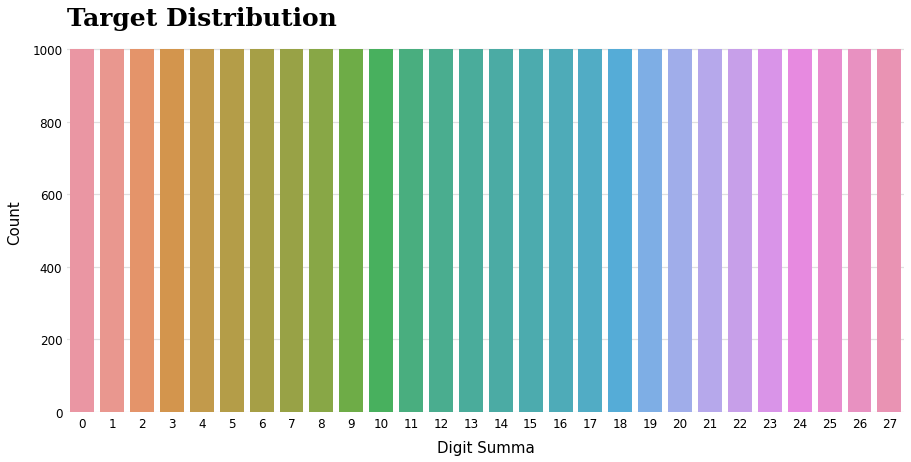

In [30]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot()
ax.grid(color="lightgrey", alpha=0.7, linewidth=1.2, zorder=0)
sns.countplot(x="digit_sum",data=train_data, zorder=2, ax=ax)
ax.xaxis.set_tick_params(size=0, labelsize=12, pad=5)
ax.yaxis.set_tick_params(size=0, labelsize=12, pad=5)
ax.set_xlabel("Digit Summa", fontsize=15, labelpad=10)
ax.set_ylabel("Count", fontsize=15, labelpad=10)
ax.set_title("Target Distribution", fontweight="bold", fontsize=25, fontfamily="serif", loc="left")
hide_spines(ax)
fig.show()

<ipython-input-28-42cfafb00e9d>:46: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-28-42cfafb00e9d>:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(cols*3, rows*3))


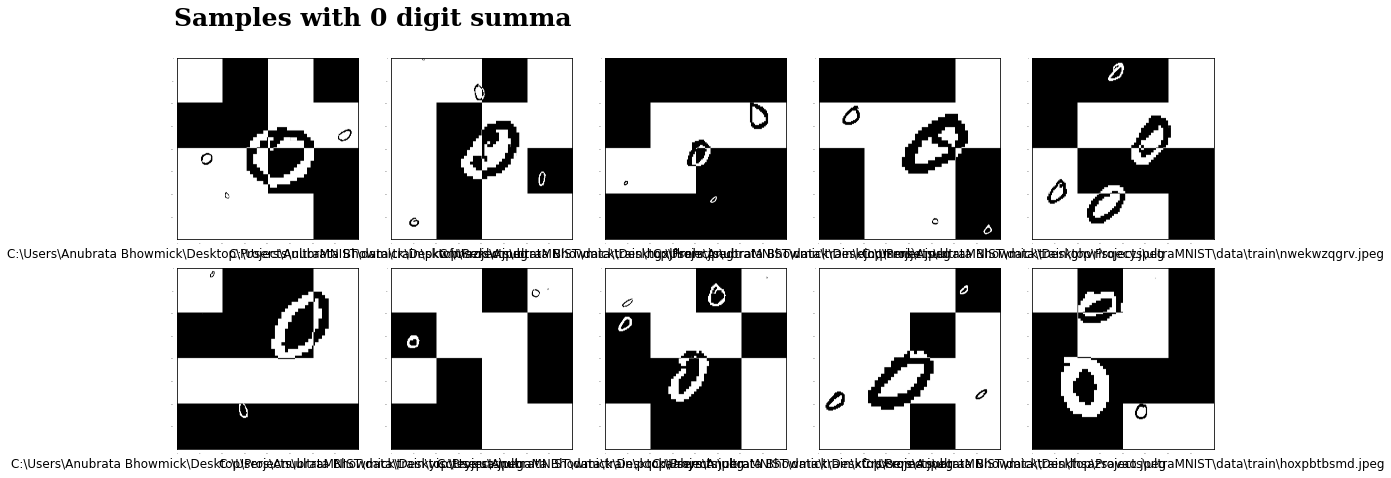

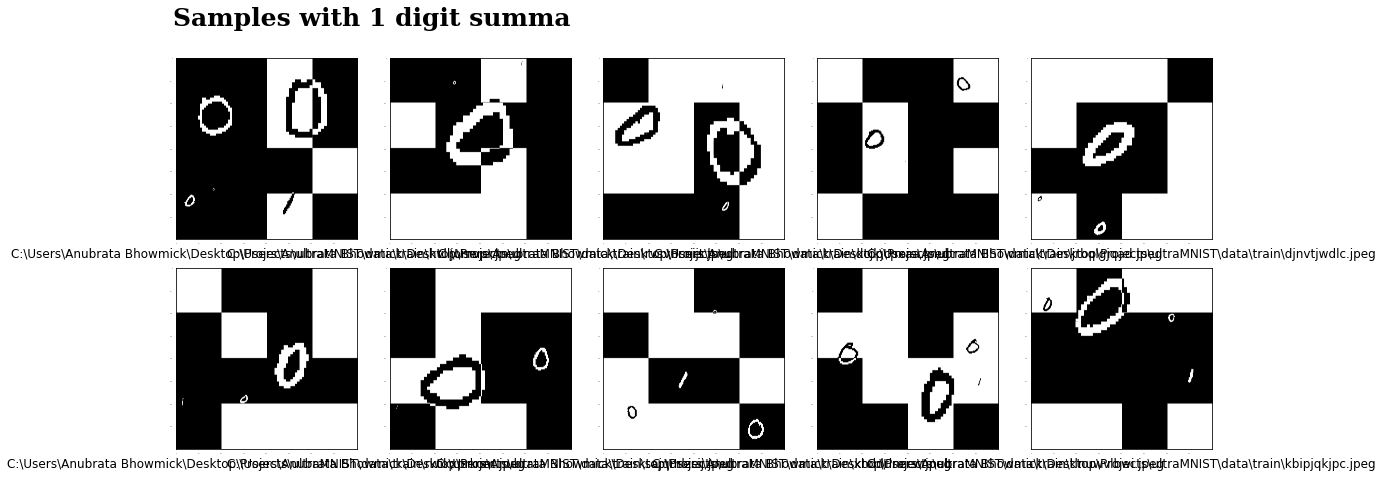

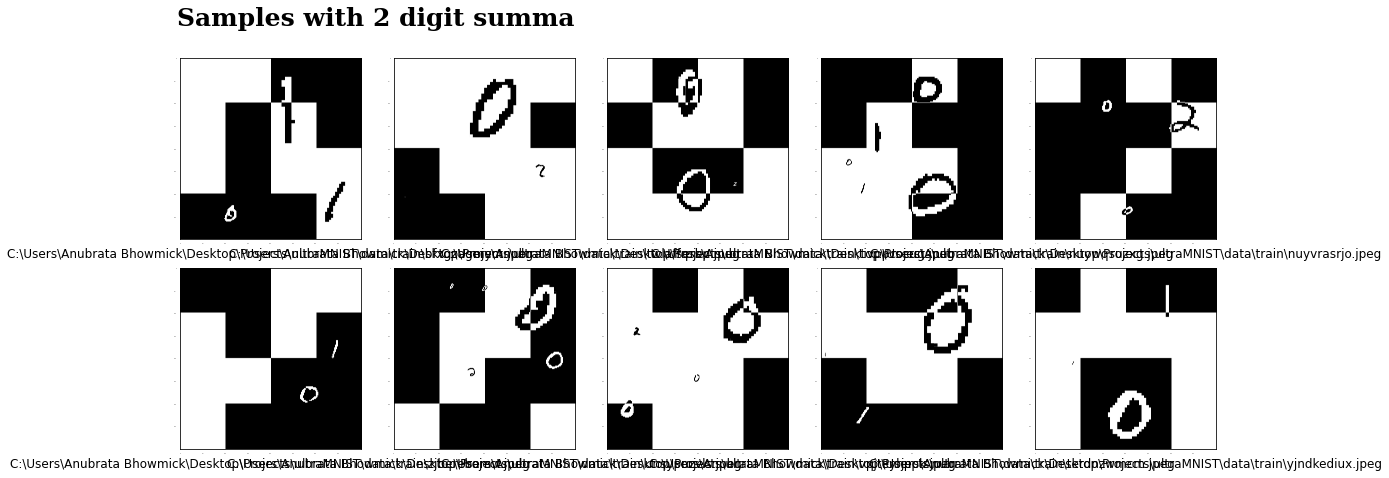

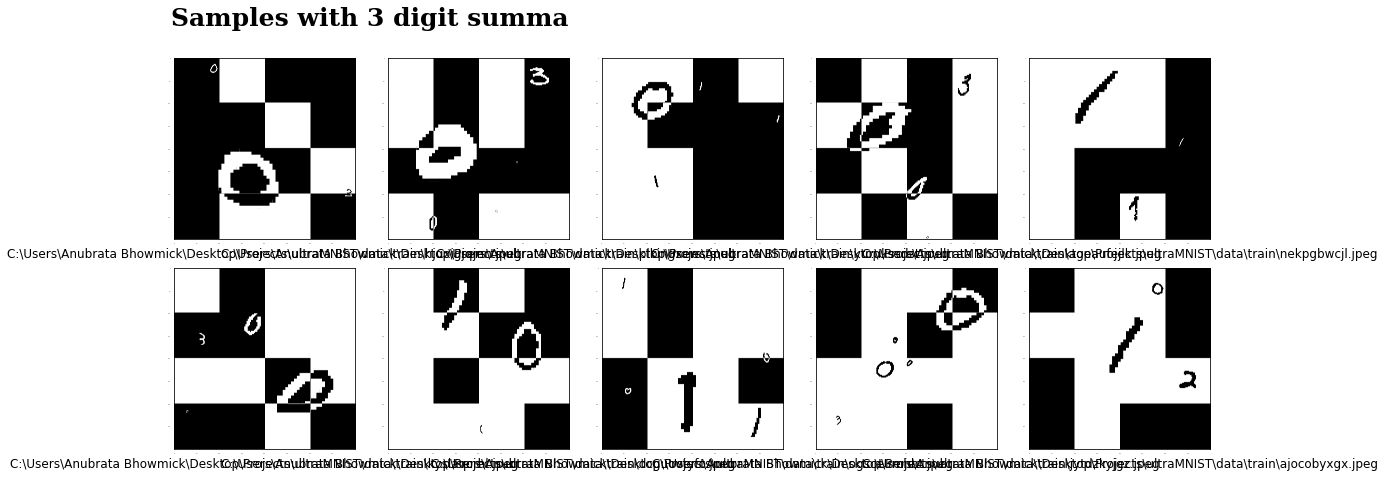

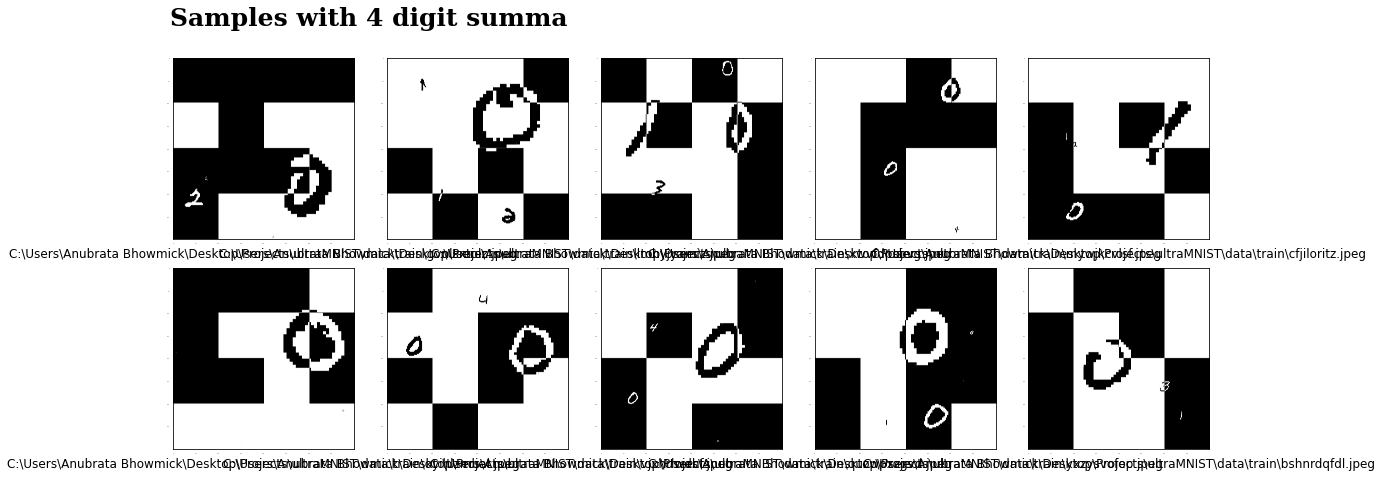

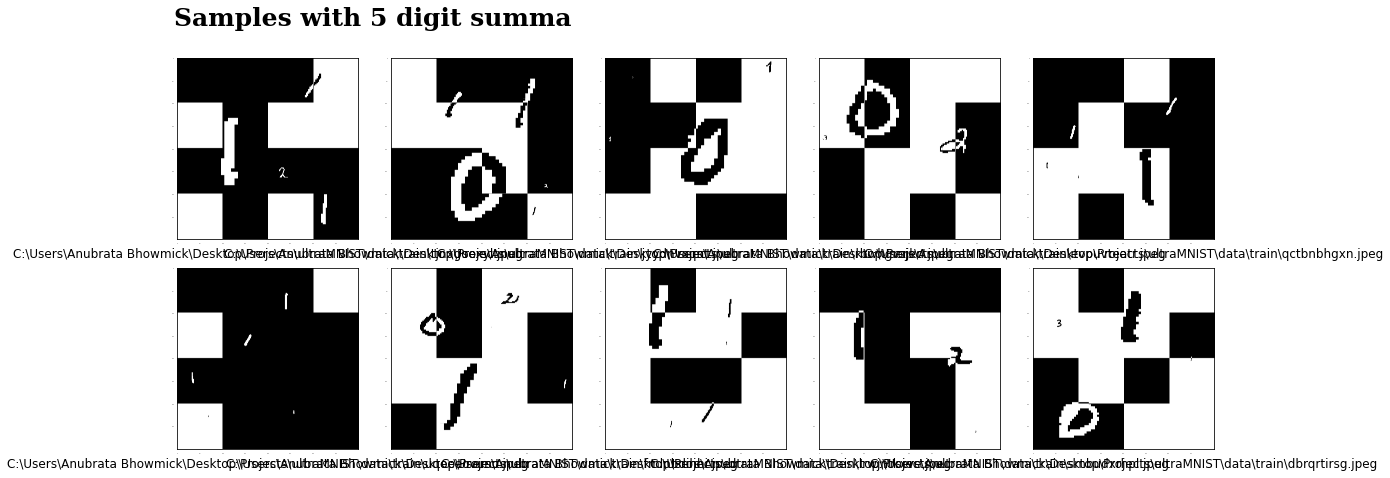

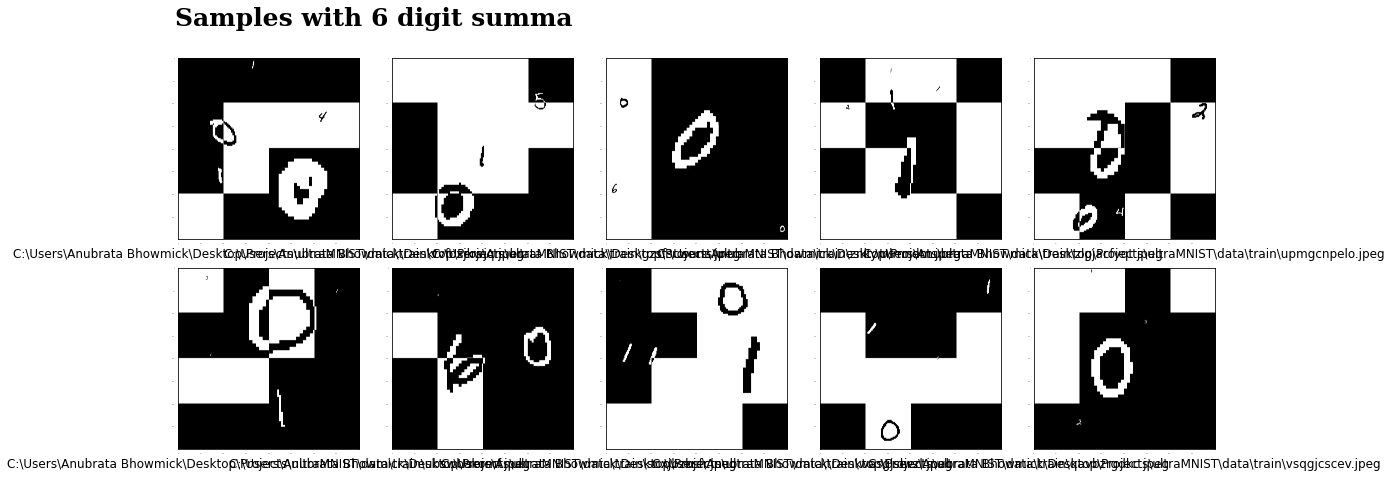

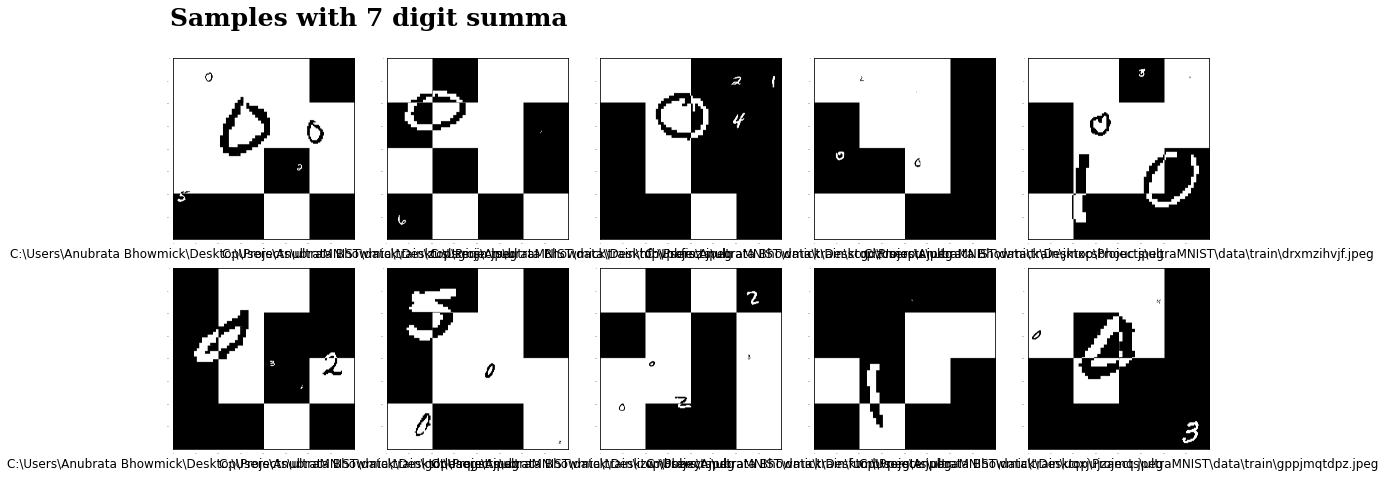

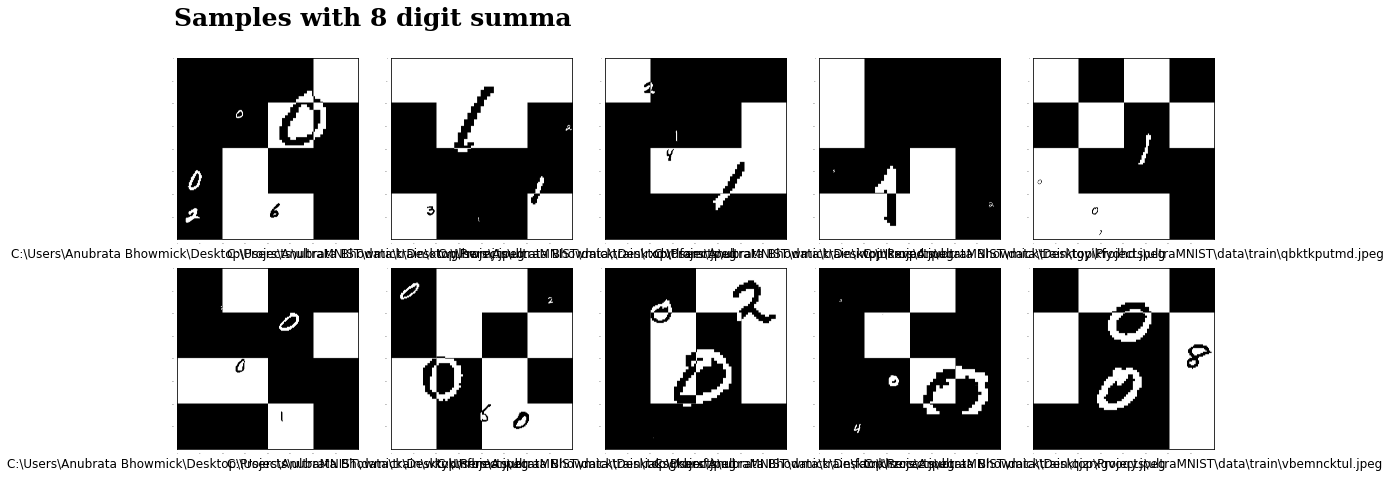

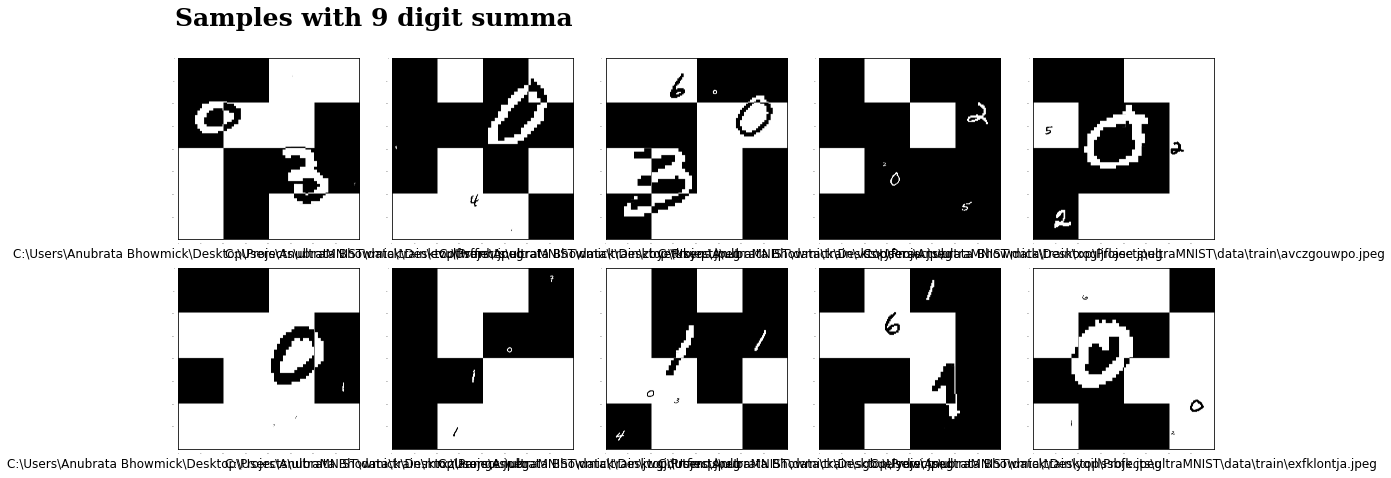

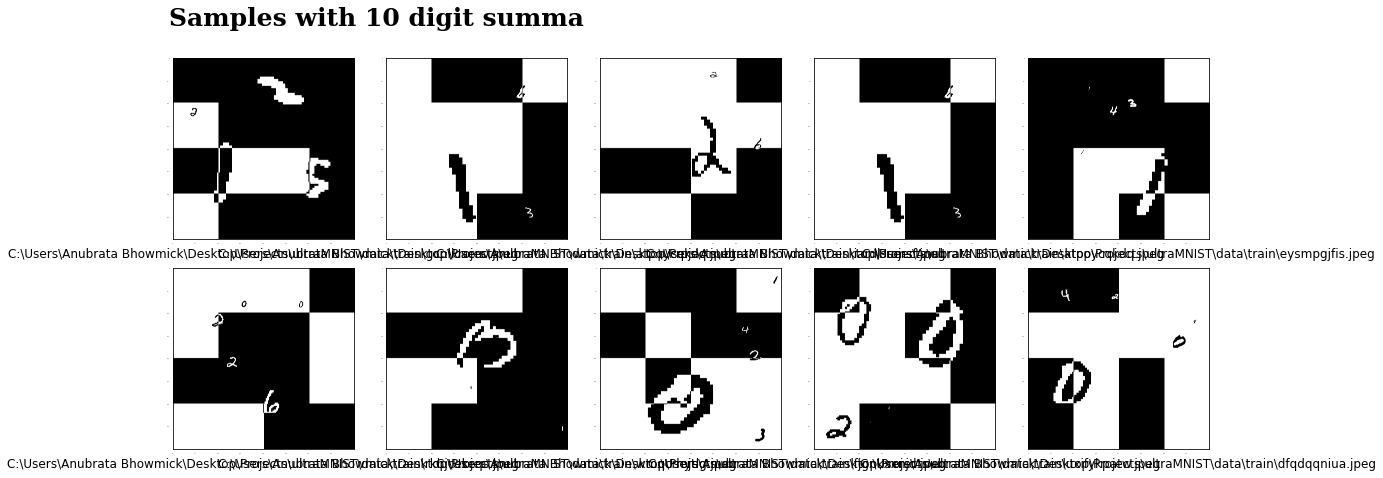

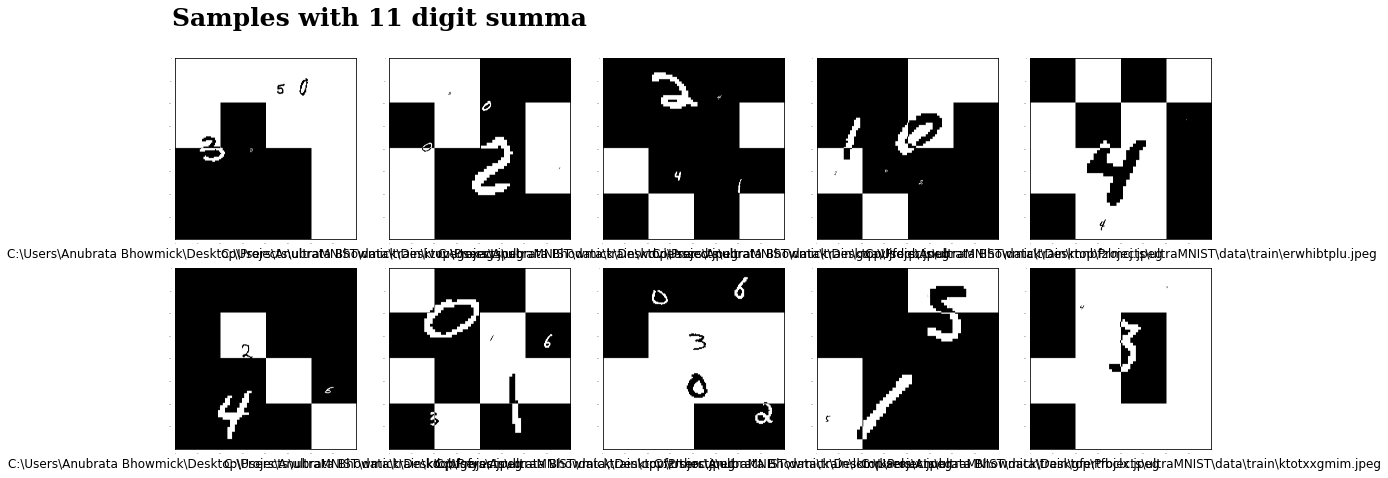

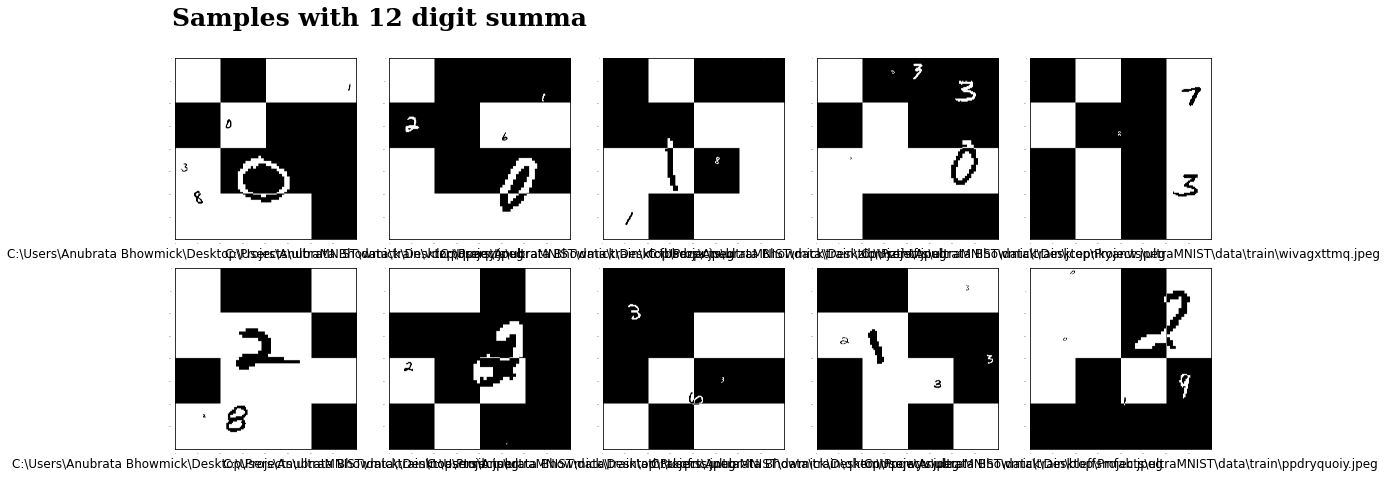

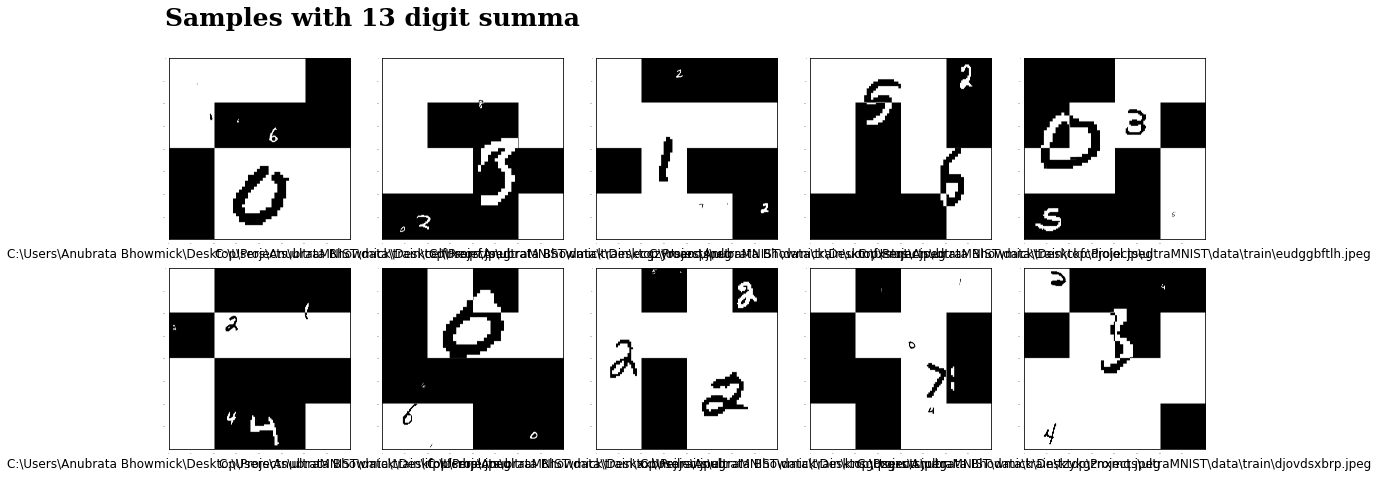

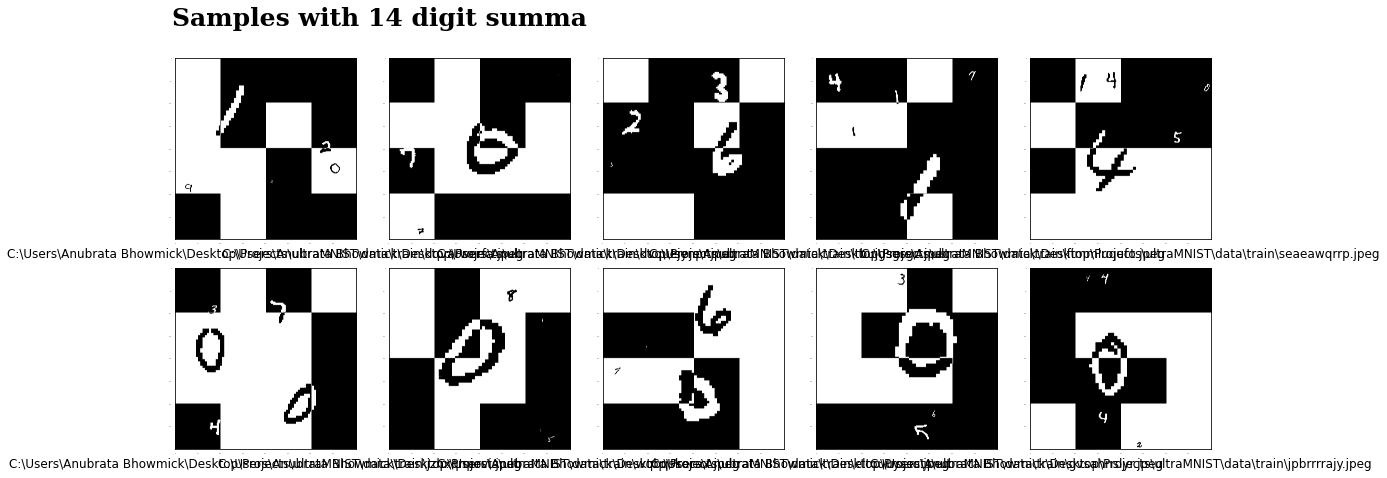

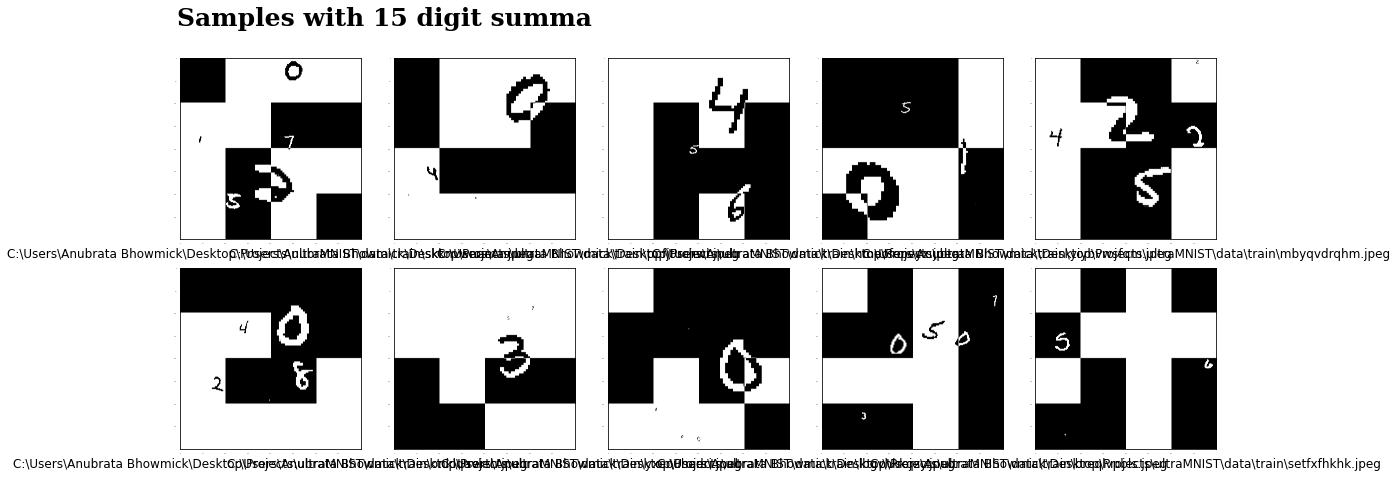

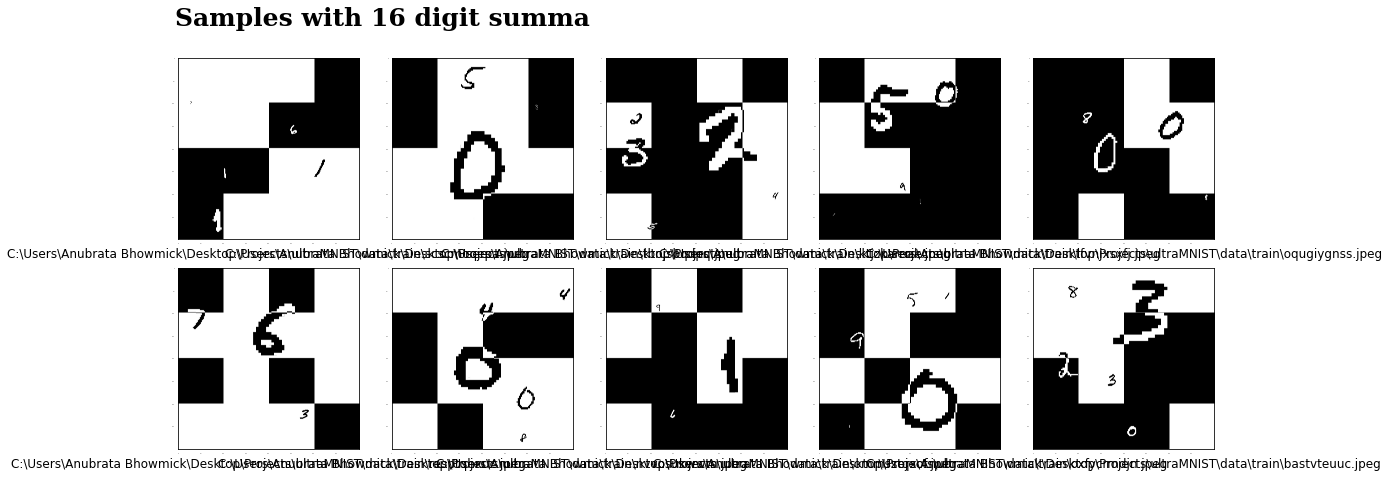

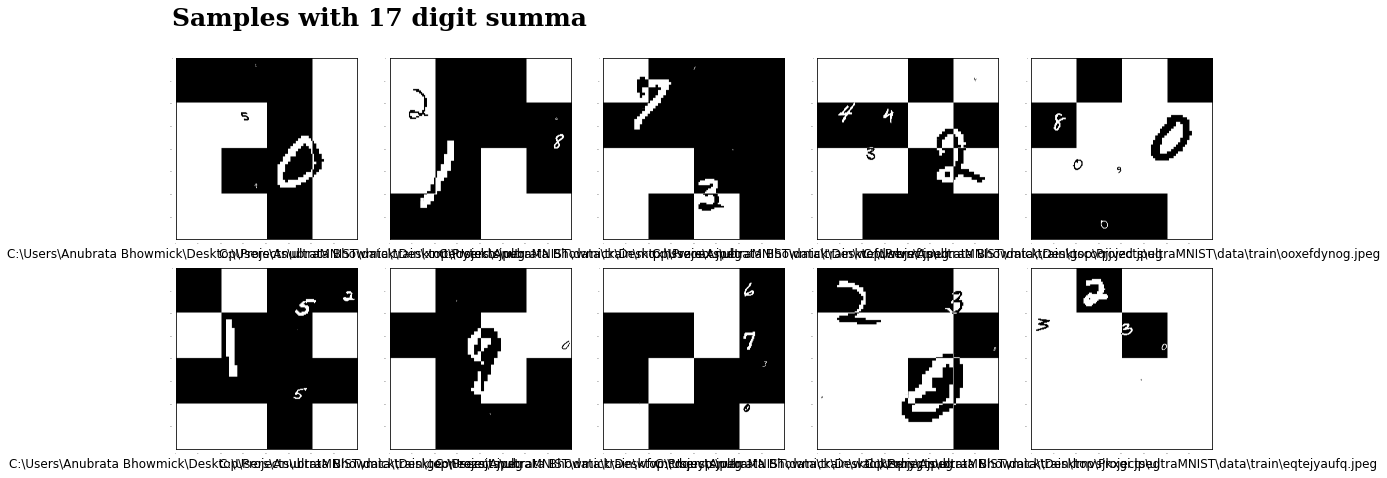

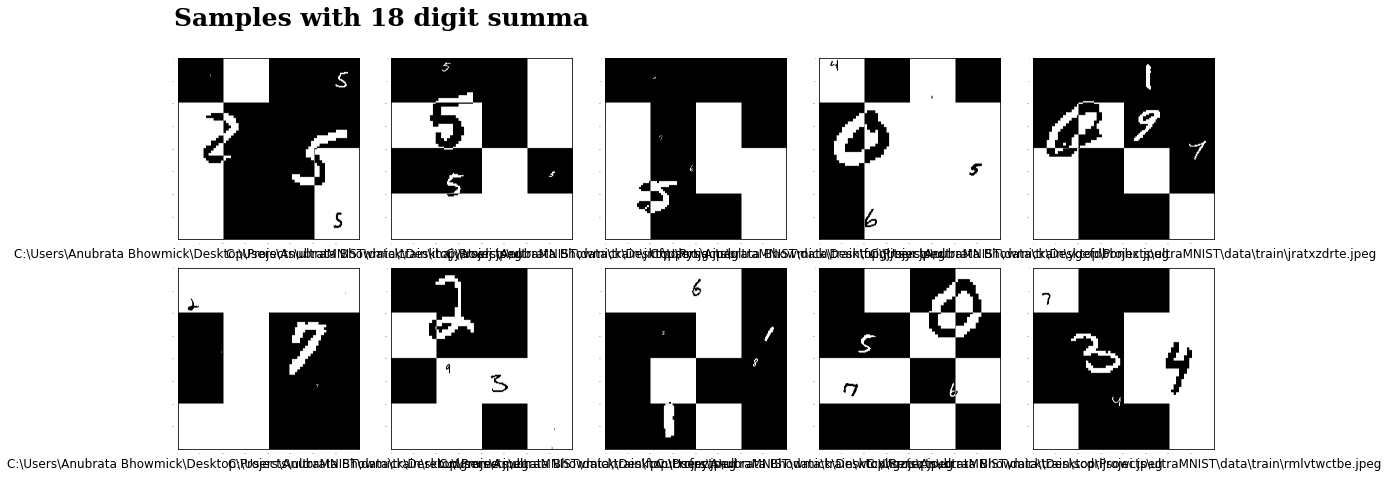

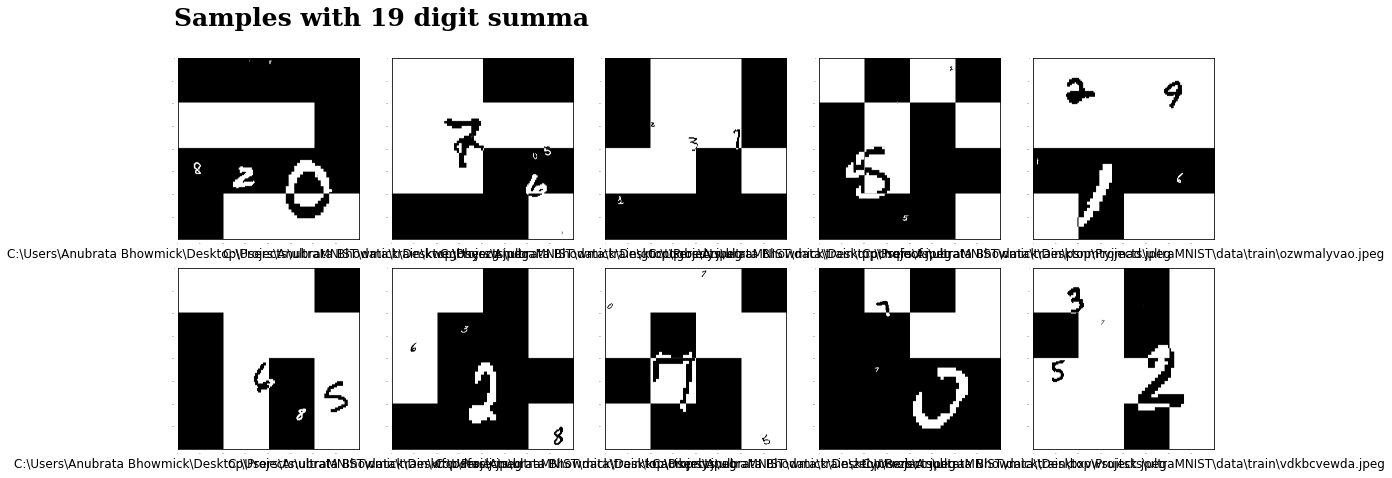

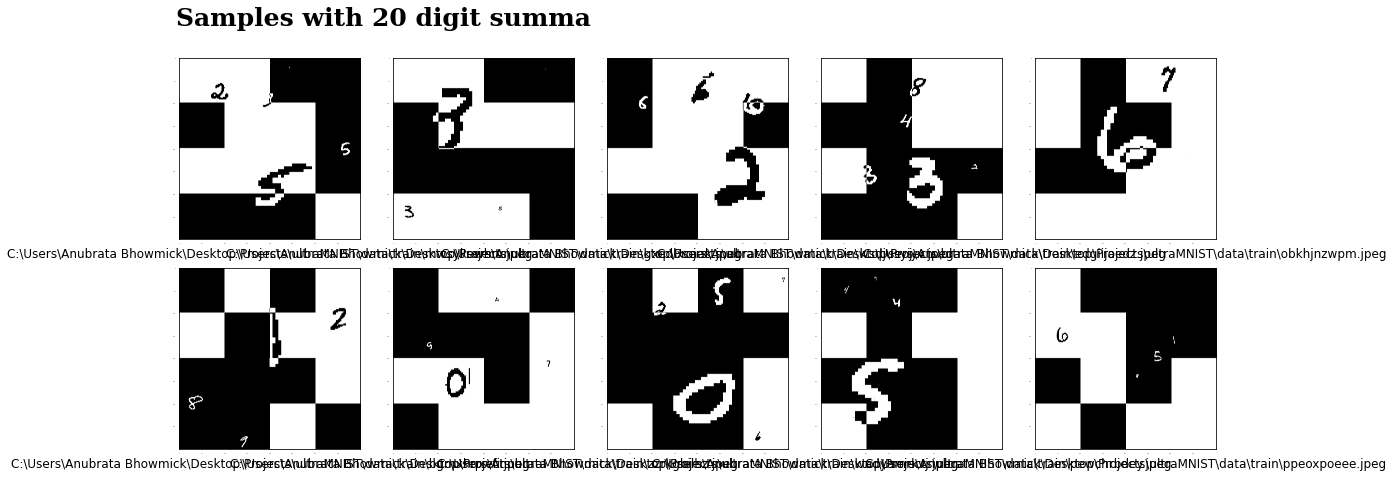

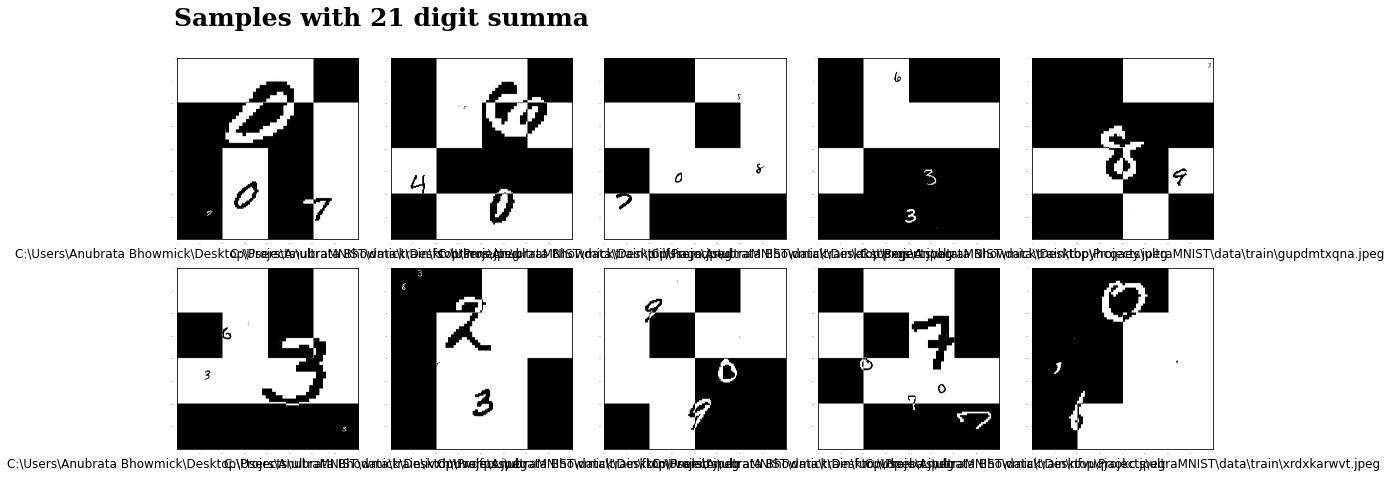

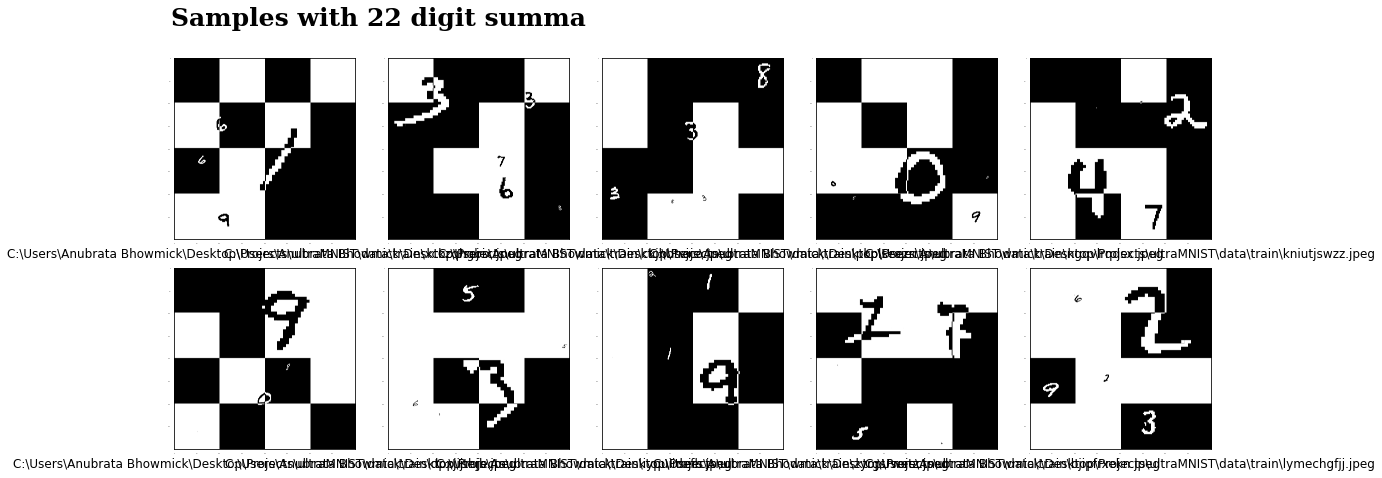

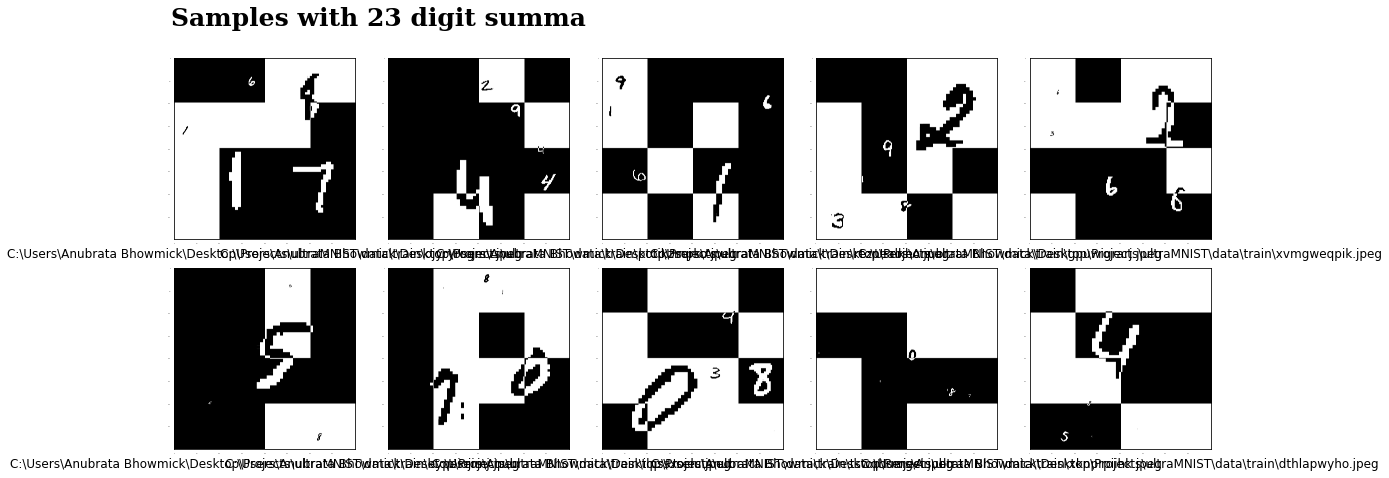

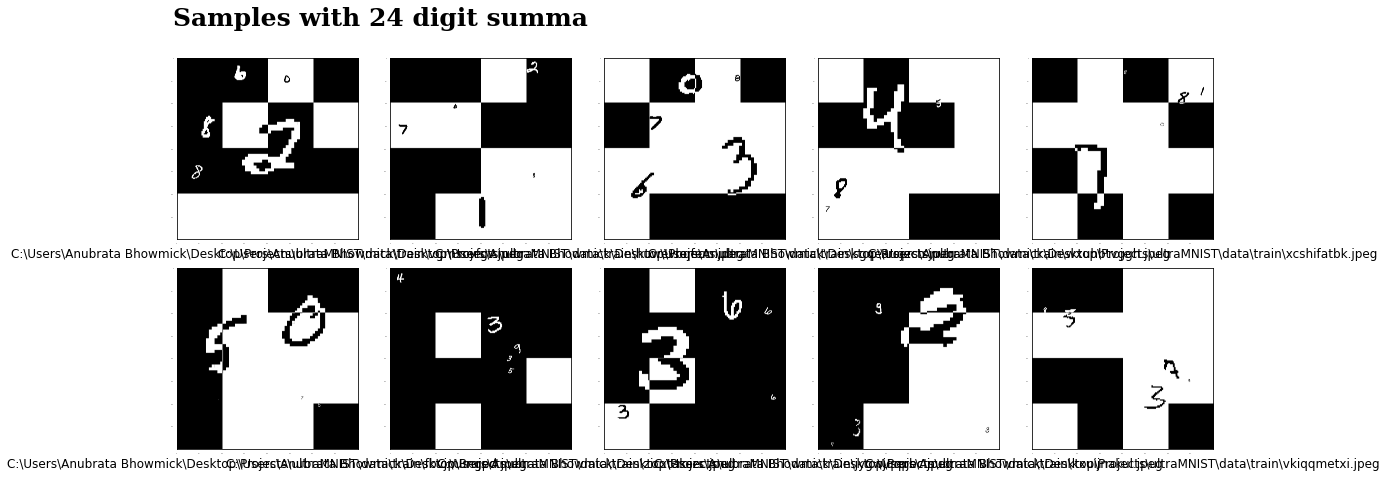

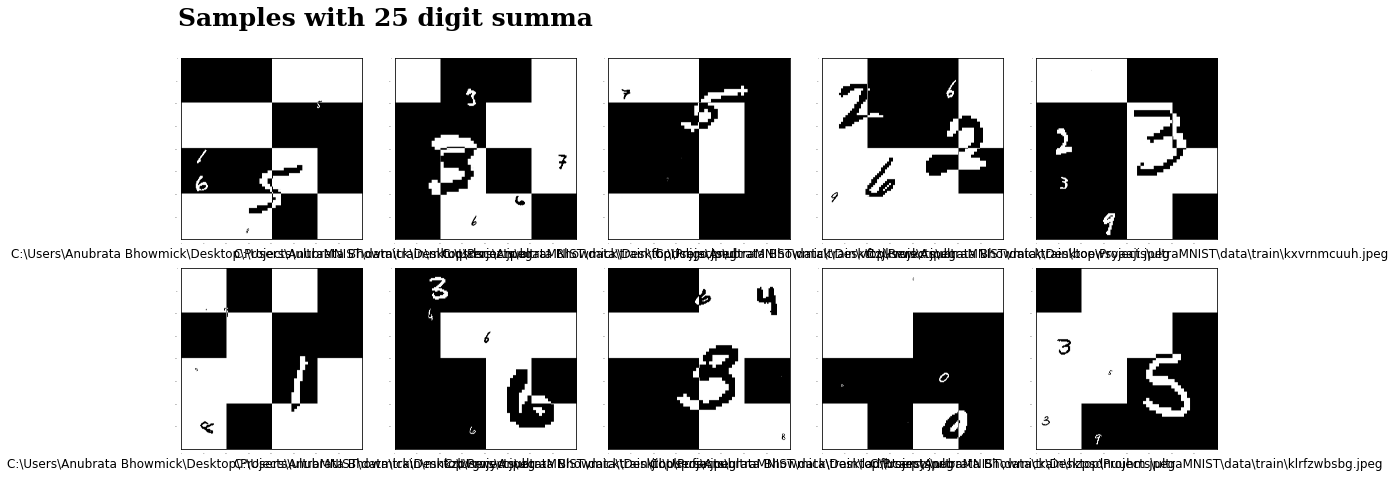

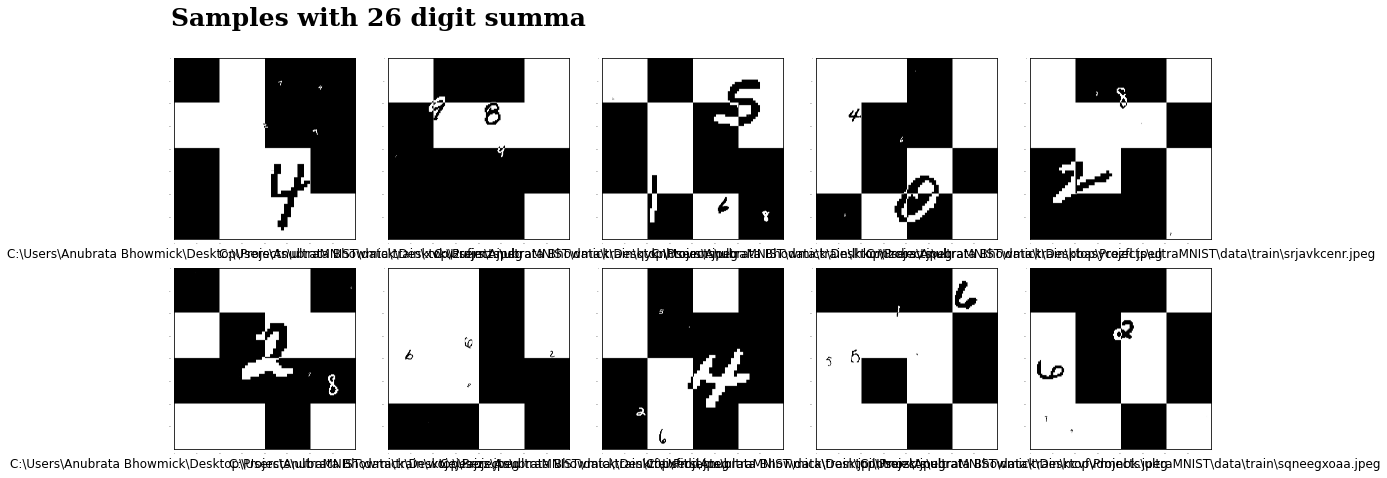

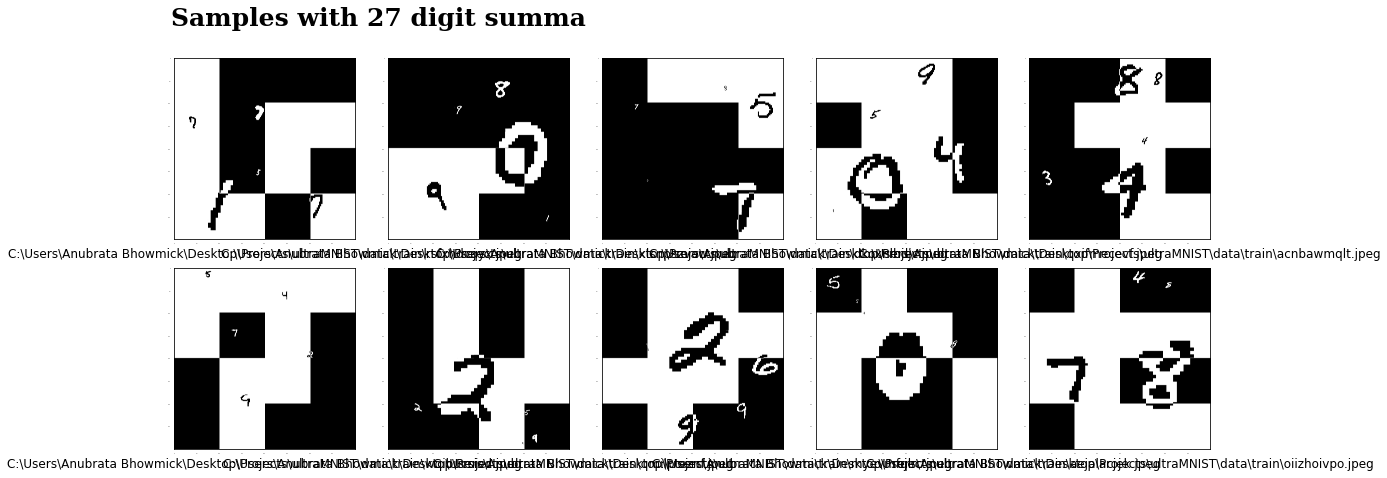

In [33]:
targets = train_data["digit_sum"].unique()
targets.sort()
for target in targets:
    plot_images_with_target(train_data, target=target, rows=2, cols=5)

<ipython-input-28-42cfafb00e9d>:66: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


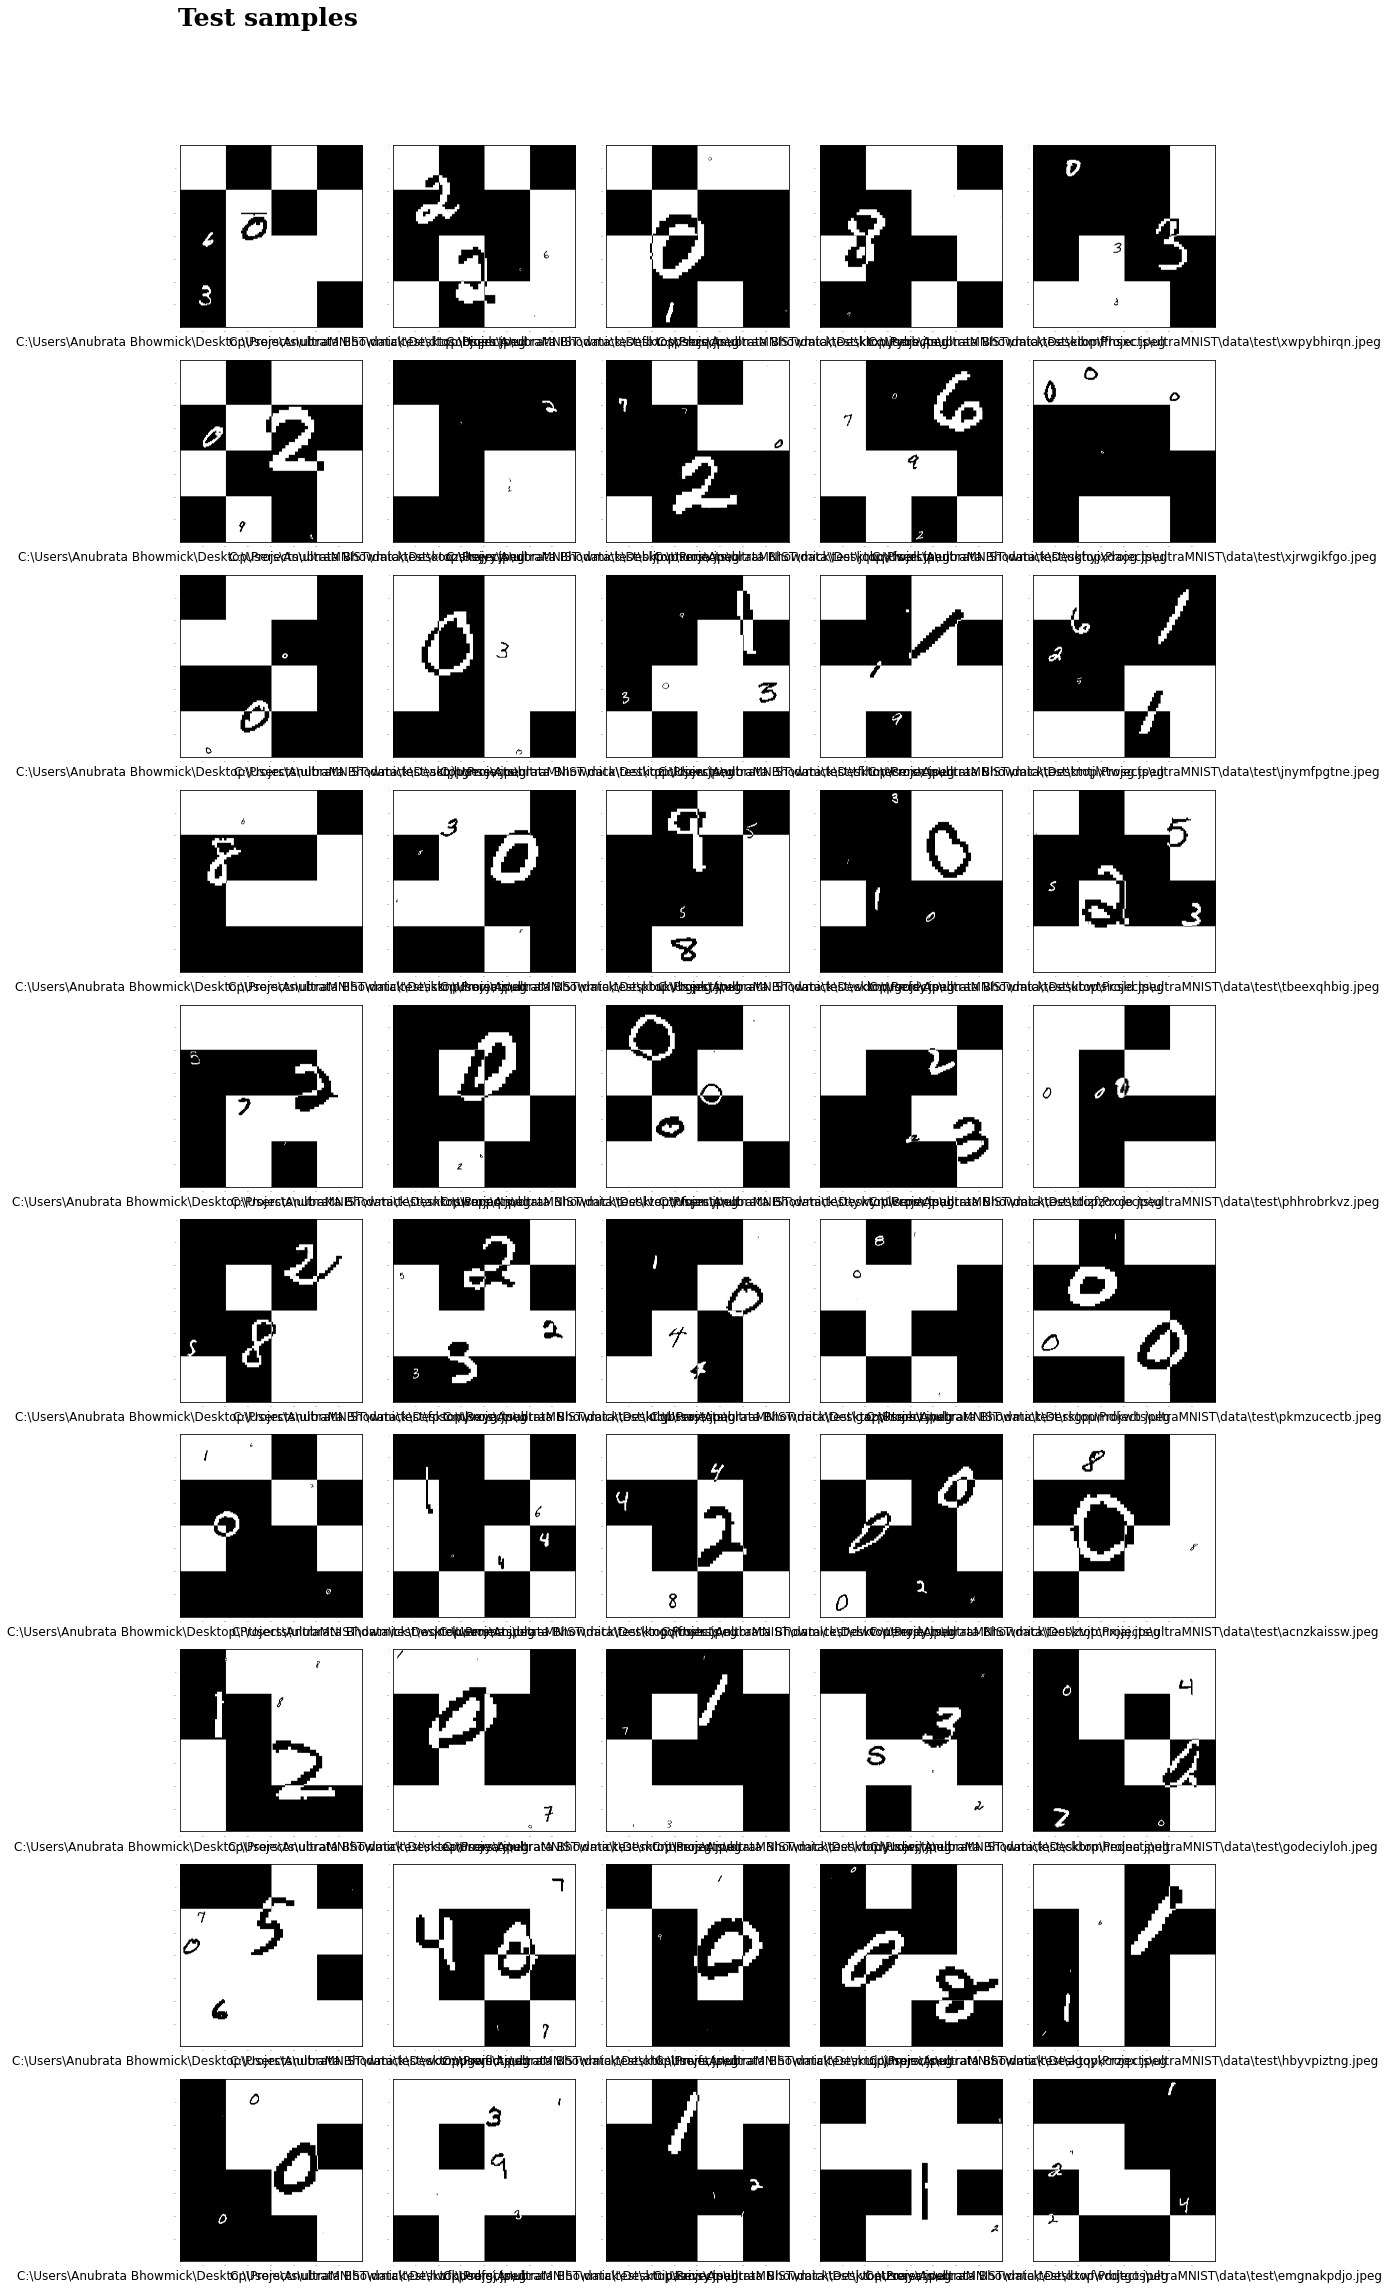

In [34]:
plot_images(test_data, rows=10, cols=5, title="Test samples")